 # Importing needed packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Reading the data in pandas and preview it

In [3]:
df=pd.read_csv("F:\DATA\MAIN\/House.csv")
print(df.head)
print(df.value_counts)


<bound method NDFrame.head of      Area  Room  Parking  Warehouse  Elevator             Address  \
0      63     1     True       True      True             Shahran   
1      60     1     True       True      True             Shahran   
2      79     2     True       True      True              Pardis   
3      95     2     True       True      True       Shahrake Qods   
4     123     2     True       True      True      Shahrake Gharb   
...   ...   ...      ...        ...       ...                 ...   
3474   86     2     True       True      True  Southern Janatabad   
3475   83     2     True       True      True            Niavaran   
3476   75     2    False      False     False              Parand   
3477  105     2     True       True      True              Dorous   
3478   82     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+08    18333.33  
3     9.0

# Now Lets plot the data with histogram

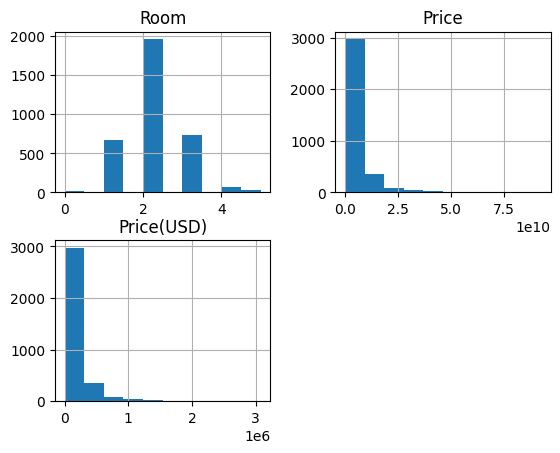

In [4]:
viz = df[['Area','Room','Parking','Warehouse','Elevator','Address'	,'Price','Price(USD)',]]
viz.hist()
plt.show()

# Cleaning the data

In [5]:
df = df[df['Address'].notna() & (df['Address'] != "")]

df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df = df[df['Area'] <= 900]


df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)
df = pd.get_dummies(df, columns=['Address'], drop_first=True)

df.to_csv('House_cleaned.csv', index=False)


# Targeting x , y 
### and normalize the data

In [6]:
x = df.drop(['Price', 'Price(USD)'], axis=1)          
y = df['Price(USD)']                                  


# normalize the data

x = x / x.max()                    # or   x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = y / y.max()                 


# test and train split (manual)

In [7]:
msk = np.random.rand(len(df)) < 0.9
train_x = x[msk]
test_x = x[~msk]
train_y = y[msk]
test_y = y[~msk]

# modeling 

In [8]:
regr = RandomForestRegressor(n_estimators=100, random_state=42).fit(train_x,train_y)         

# checking the resault and scatter 

In [9]:
test_y_ = regr.predict(test_x)

MAE = mean_absolute_error(test_y, test_y_)
MSE=np.mean((test_y_ - test_y)**2)
r2 = r2_score(test_y, test_y_)

print('Mean Absolute Error:',MAE)
print('MSE:',MSE)
print('R2:',r2)

Mean Absolute Error: 0.01618389811039039
MSE: 0.0014131288379866781
R2: 0.8311409741595485


# Plot

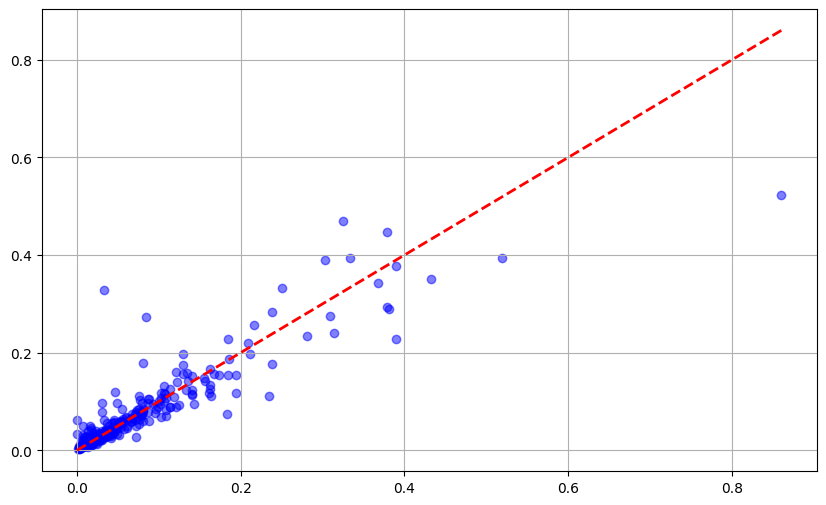

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(test_y, test_y_, color='blue', alpha=0.5, )
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2,)
plt.grid(True)
plt.show()